# WHAT TO GROW!

In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.axes_grid1 import ImageGrid
import math

In [2]:
image_size = 200
batch_size = 10
no_of_classes=8
class_labels=['Arid Soil', 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil', 'Red Soil', 'Saline Soil', 'Yellow Soil']

target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory('../CNN_Model/test_images', 
        target_size=(image_size, image_size),
        batch_size = batch_size,
        classes = ['test'],
        class_mode='categorical',
        shuffle=False)


Found 7 images belonging to 1 classes.


In [4]:
print (test_generator.class_indices)
print (test_generator.shuffle)
print (test_generator.samples)

{'test': 0}
False
7


In [5]:
class_mapping = {v:k for k,v in test_generator.class_indices.items()}

In [6]:
x,y = next(test_generator)
print('x: ',type(x))
print('y: ',type(y))
print('x: ',x.shape)
print('y: ',y.shape)

x:  <class 'numpy.ndarray'>
y:  <class 'numpy.ndarray'>
x:  (7, 200, 200, 3)
y:  (7, 1)


In [7]:
#Get class int vale from one hot encoded labels
y_int = np.argmax(y,axis=-1)
y_int

array([0, 0, 0, 0, 0, 0, 0])

In [8]:
def show_grid(image_list,nrows,ncols,label_list=None,show_labels=False,savename=None,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        if show_labels:
            ax.set_title(class_mapping[y_int[i]])
    if savename != None:
        plt.savefig(savename,bbox_inches='tight')

In [9]:
def n_maximum_elements(list1, N):
    final_list = []
 
    for i in range(0, N):
        max1 = 0
        max_pos=0
         
        for j in range(len(list1)):    
            if list1[j] > 0.1:
                max1 = list1[j];
                max_pos=j
                 
        list1.remove(max1);
        final_list.append(max_pos)
         
    return final_list

In [10]:
model = pickle.load(open('CNN_model.pickle', 'rb'))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-16 10:51:14.616975: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-16 10:51:14.617267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
y_prob = model.predict(test_generator)
y_prob

2022-11-16 10:51:15.037826: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-16 10:51:15.080398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[9.9999011e-01, 3.4320158e-11, 2.5545191e-08, 6.2650137e-12,
        2.5271824e-10, 9.6105942e-15, 9.9167228e-06, 9.7272355e-12],
       [6.8511031e-06, 9.8952311e-01, 2.2075425e-03, 7.3517207e-08,
        8.2597658e-03, 7.4093887e-10, 2.6542455e-06, 3.6812587e-08],
       [9.8134335e-03, 1.3020006e-06, 6.9290888e-01, 1.7403438e-10,
        7.1401258e-09, 6.7394427e-14, 2.9727635e-01, 1.2153042e-09],
       [1.9410692e-02, 2.4217719e-08, 3.4337932e-06, 3.8412567e-02,
        4.8276058e-07, 9.4212389e-01, 4.7051120e-08, 4.8846996e-05],
       [1.4968841e-02, 1.1793360e-07, 3.0705245e-04, 1.7261212e-10,
        1.1276474e-09, 8.5616236e-13, 9.8472393e-01, 2.3434978e-09],
       [1.1398338e-02, 9.3438949e-08, 2.1287531e-04, 2.9776324e-09,
        4.6233140e-08, 6.6917275e-12, 9.8838860e-01, 1.9661696e-08],
       [1.6736852e-01, 8.6866891e-07, 2.3863693e-06, 1.3539490e-02,
        3.6995269e-05, 5.6644846e-03, 5.6457339e-04, 8.1282276e-01]],
      dtype=float32)

In [12]:
y_pred = y_prob.argmax(axis=-1)
print(y_pred)
print(len(y_pred))

[0 1 2 5 6 6 7]
7


In [13]:
number_of_examples = len(test_generator.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * batch_size)) 
# 1.0 above is to skip integer division

y_test = []

for i in range(0,int(number_of_generator_calls)):
    y_test.extend(np.argmax(np.array(test_generator[i][1]),axis=-1))

print(y_test)
print(len(y_test))

[0, 0, 0, 0, 0, 0, 0]
7


In [14]:
df=pd.read_csv('soil_properties.csv')
df.set_index('soil_type', inplace=True)
df

,organic_matter,water_capacity,minerals,pH_level,regions,what_to_grow,water_val,ph_val,organic_val
soil_type,,,,,,,,,
Arid Soil,2-4%,low,"gypsum, calcium carbonates, sodium",8.5-10.0,"haryana, western rajasthan, punjab, gujrat","barley, cotton, wheat, millets, maize, pulses",0.2,9.25,3.0
Black Soil,40-50%,high,"iron, lime, calcium, potash, magnesium, aluminium",7.2-8.5,"gujrat, maharashtra, karnataka, madhya pradesh","cotton, wheat, jowar, linseed, castor, sunflow...",0.4,7.85,45.0
Cinder Soil,5-7%,low,"aluminium, iron, sodium, carbon",6.6-7.8,"bihar, southern uttaranchal, west bengal, oris...","beans, bok choy, chard, chives, garlic, leek, ...",0.2,7.20,6.0
Laterite Soil,0-5%,low,"nitrogen, phosphorus, potassium, lime, magnesi...",5.5-7.5,"western ghats, eastern ghats, southern maharas...","tea, coffee, rubber, cinchona, coconut, areca nut",0.2,6.50,2.5
Peat Soil,33-67%,very high,"iron, aluminium",3.7-5.2,"southern uttarakhand, northern bihar, coastal ...","potatoes, sugar beet, celery, onions, carrots,...",0.5,4.45,50.0
Red Soil,4-8%,low,"iron, potassium, nitrogen, phosphorous",5.6-7.1,"tamil nadu, karnataka, southern maharashtra, e...","cotton, wheat, rice, pulses, millets, tobacco,...",0.2,6.35,6.0
Saline Soil,0-4%,moderate,"sodium, gypsum, magnesium, calcium",7-8.5,"gujrat, bihar, haryana, rajasthan, maharashtra...","cotton, alfalfa, cereals, grain sorghum, sugar...",0.3,7.75,2.0
Yellow Soil,2-5%,very low,"iron, sodium, potassium, nitrogen",6.6-7.3,"odisha, chattisgarh, west bengal, maharashtra,...","Rice, wheat, sugarcane, maize/corn, groundnut,...",0.1,6.95,3.5


In [19]:
def find_top_soils(prob):
    op=[]
    for i in range(no_of_classes):
        if(prob[i]>0.05):
            op.append(i)
    return op

def find_regions(soils):
    op=[]
    for i,v in enumerate(soils):
        sub=str(df.at[v,'regions'])
        subs=sub.split(", ")
        for k in subs:
            op.append(k)
    return list(set(op))

def find_whattogrow(soils):
    op=[]
    for i,v in enumerate(soils):
        sub=str(df.at[v,'what_to_grow'])
        subs=sub.split(", ")
        for k in subs:
            op.append(k)
    return list(set(op))

def find_minerals(soils):
    op=[]
    for i,v in enumerate(soils):
        sub=str(df.at[v,'minerals'])
        subs=sub.split(", ")
        for k in subs:
            op.append(k)
    return list(set(op))

def find_moisture(prob):
    op=0
    for i in range(no_of_classes):
        op+=(df.iat[i,6]*prob[i])
    return op*100

def find_ph(prob):
    op=0
    for i in range(no_of_classes):
        op+=(df.iat[i,7]*prob[i])
    return op

def find_organic(prob):
    op=0
    for i in range(no_of_classes):
        op+=(df.iat[i,8]*prob[i])
    return op

# FRONT END

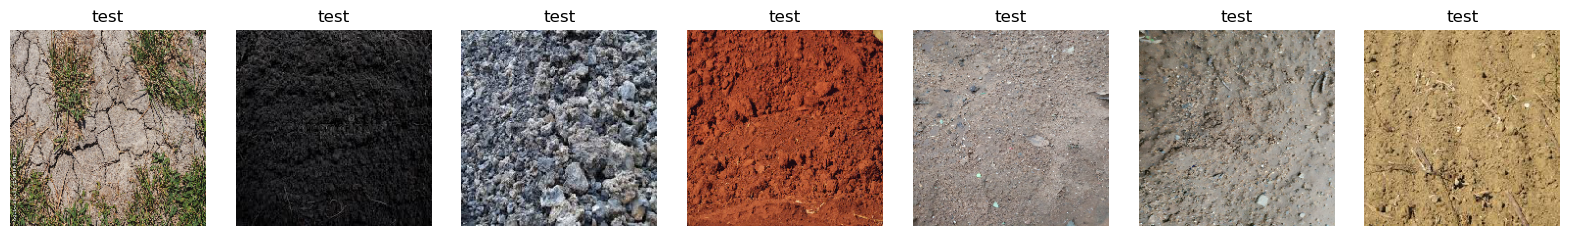

In [16]:
show_grid(x,1,test_generator.samples,label_list=y_int,show_labels=True,figsize=(20,10))

In [25]:
for i,v in enumerate(y_prob):
    top_idx=find_top_soils(v)
    top= [class_labels[j] for j in top_idx]
    max_soil=class_labels[y_pred[i]]
    regions=find_regions(top)
    whattogrow=find_whattogrow(top)
    minerals=find_minerals(top)
    moisture=find_moisture(v)
    ph=find_ph(v)
    organic=find_organic(v)

    
    print("\n")
    print("IMAGE",i+1)
    print("\n")
    print("Maximum Soil Type Content:", max_soil)
    print("\n")
    print("Top soils:", *top, sep=", ")
    print("\n")
    print("Moisture:", round(moisture,2),"%")
    print("\n")
    print("pH:", round(ph,2))
    print("\n")
    print("Oranic Matter:", round(organic,2),"%")
    print("\n")
    print("Regions:", *regions, sep=', ')
    print("\n")
    print("What to Grow:", *whattogrow, sep=', ')
    print("\n")
    print("Minerals:", *minerals, sep=', ')
    print("_"*200)



IMAGE 1


Maximum Soil Type Content: Arid Soil


Top soils:, Arid Soil


Moisture: 20.0 %


pH: 9.25


Oranic Matter: 3.0 %


Regions:, gujrat, western rajasthan, punjab, haryana


What to Grow:, barley, cotton, maize, wheat, millets, pulses


Minerals:, sodium, calcium carbonates, gypsum
________________________________________________________________________________________________________________________________________________________________________________________________________


IMAGE 2


Maximum Soil Type Content: Black Soil


Top soils:, Black Soil


Moisture: 40.04 %


pH: 7.82


Oranic Matter: 44.95 %


Regions:, gujrat, karnataka, maharashtra, madhya pradesh


What to Grow:, linseed, castor, sunflower and millets, cotton, wheat, jowar


Minerals:, iron, magnesium, potash, calcium, aluminium, lime
________________________________________________________________________________________________________________________________________________________________________________